In [27]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import streamlit as st
plt.style.use('fivethirtyeight')


In [28]:
#Download the data
df = yf.download('AAPL', start='2020-01-01', end='2025-09-30',group_by='column')
df.columns = df.columns.get_level_values(0)  # Remove the mutli-index
df = df.reset_index() 
df

/var/folders/q8/m5841jms1gn0t81m9wcbxlv00000gn/T/ipykernel_6991/2071057221.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2025-09-30',group_by='column')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
1,2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2,2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
3,2020-01-07,72.065170,72.671364,71.845392,72.415360,108872000
4,2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200
...,...,...,...,...,...,...
1438,2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200
1439,2025-09-24,252.309998,255.740005,251.039993,255.220001,42303700
1440,2025-09-25,256.869995,257.170013,251.710007,253.210007,55202100
1441,2025-09-26,255.460007,257.600006,253.779999,254.100006,46076300


In [29]:
df.shape

(1443, 6)

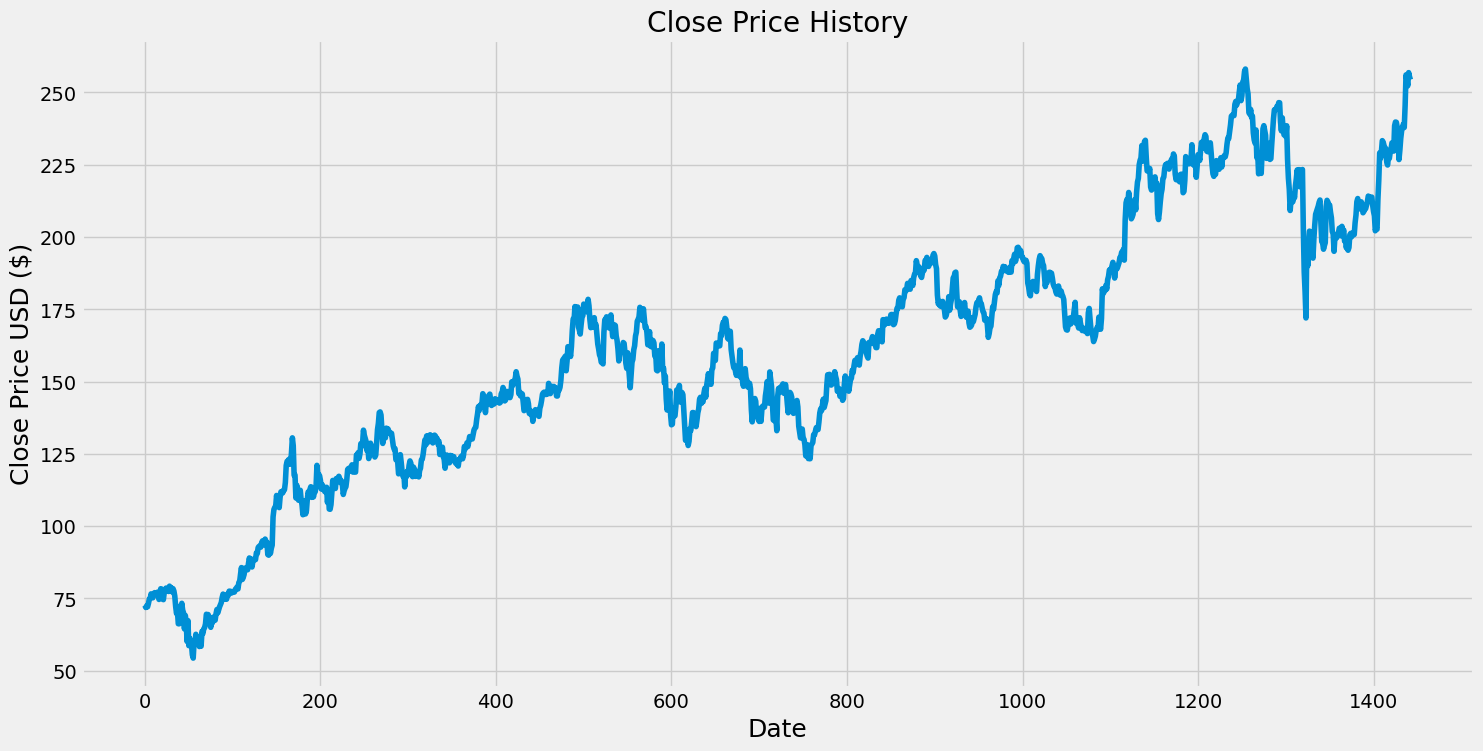

In [30]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [31]:
# create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )  
training_data_len

1155

In [32]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.08941496],
       [0.08595437],
       [0.08876309],
       ...,
       [0.99394596],
       [0.98702702],
       [0.98197265]])

In [ ]:
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)


[array([0.08941496, 0.08595437, 0.08876309, 0.08709219, 0.09278068,
       0.10041289, 0.1012426 , 0.10909989, 0.10402754, 0.10243938,
       0.10706145, 0.11119762, 0.10863771, 0.10997684, 0.11179015,
       0.11069984, 0.09960693, 0.10996501, 0.1178461 , 0.11728914,
       0.10027067, 0.09926324, 0.11133973, 0.11442108, 0.1188773 ,
       0.11363832, 0.11544404, 0.11313935, 0.12215579, 0.11938799,
       0.11948301, 0.11241473, 0.11790305, 0.11395909, 0.10534653,
       0.08768184, 0.07568367, 0.08111253, 0.05838722, 0.05819726,
       0.08843026, 0.07715675, 0.09309887, 0.08143338, 0.07681209,
       0.04965601, 0.07242876, 0.06065627, 0.02834429, 0.06367359,
       0.02119288, 0.03384443, 0.02649106, 0.02424592, 0.00578529,
       0.        , 0.02674059, 0.02512495, 0.04047312, 0.02776214])]
[np.float64(0.03616095591200891)]
[array([0.08941496, 0.08595437, 0.08876309, 0.08709219, 0.09278068,
       0.10041289, 0.1012426 , 0.10909989, 0.10402754, 0.10243938,
       0.10706145, 0.111

In [58]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1095, 60)

In [62]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1095, 60, 1)

In [63]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


/Users/victor/Documents/All Projects/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [65]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0110


In [66]:
#Create the testing dataset
#Create a new array containing scaled values from last 60 days of training data and test data
test_data = scaled_data[training_data_len - 60: , : ]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to numpy arrays
x_test=np.array(x_test)

In [68]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [69]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [71]:
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

np.float64(7.626654982817994)

/var/folders/q8/m5841jms1gn0t81m9wcbxlv00000gn/T/ipykernel_6991/3008771527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


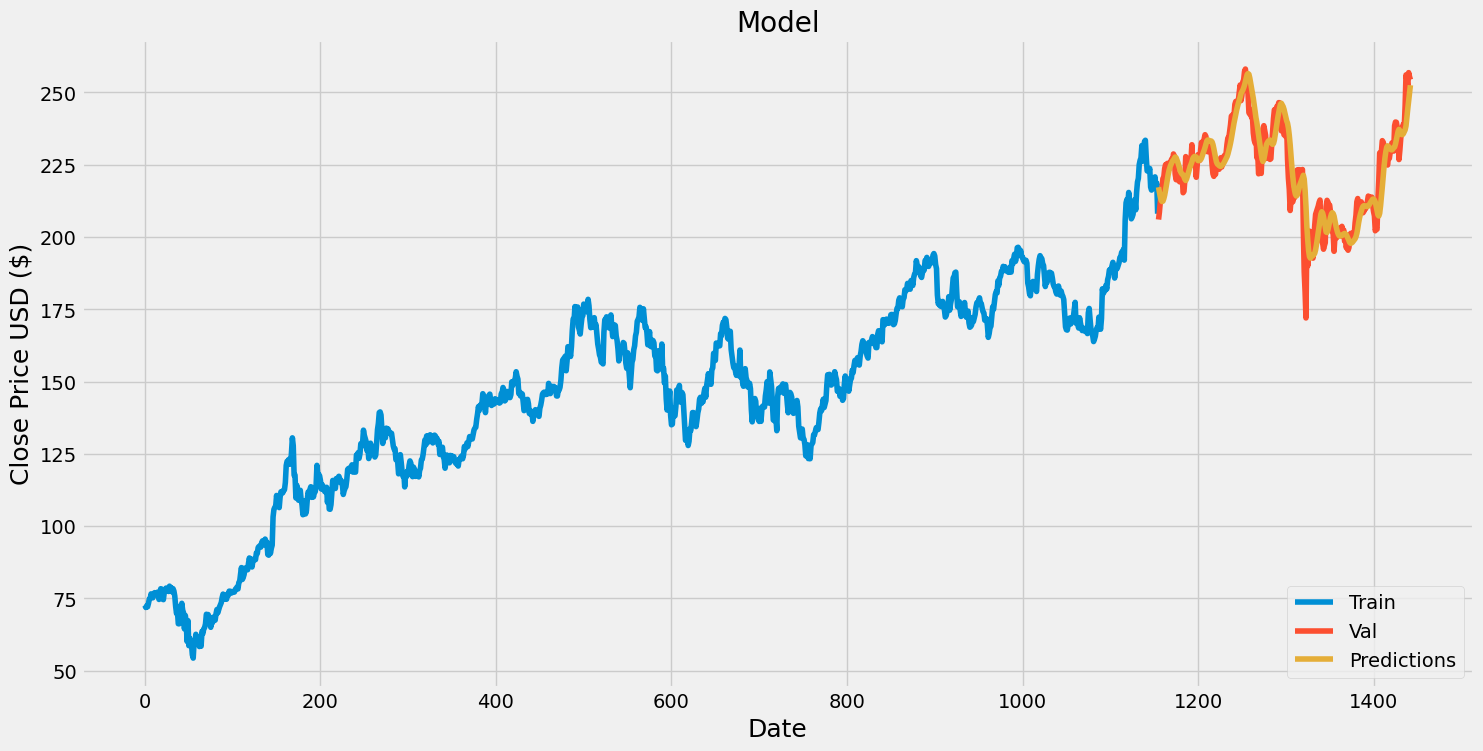

In [74]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

